<a href="https://colab.research.google.com/github/tangoc2712/face_recognition/blob/main/face_detect_fromCamera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install face_recognition

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import imutils
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [61]:
path = '/content/drive/MyDrive/ColabNotebooks/image_to_test'
images = []
classNames = []
myList = os.listdir(path)

for i in myList:
  curImg = cv2.imread(f'{path}/{i}')
  images.append(curImg)
  classNames.append(os.path.splitext(i)[0])
print(classNames)

['chip', 'bilie', 'mtp', 'tqn']


In [62]:
def encoding(imgs):
  encodeList = []
  for img in imgs:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    encode = face_recognition.face_encodings(img)[0]
    encodeList.append(encode)
  return encodeList

encodeList = encoding(images)
print(len(encodeList))

4


Open webcam to take picture


In [63]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [64]:
image_file = take_photo()

<IPython.core.display.Javascript object>

400 300


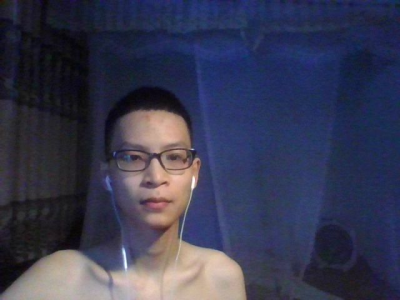

In [65]:
#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread(image_file)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

Detect face from image

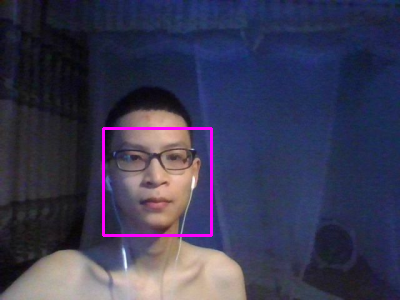

In [66]:
faceLoc = face_recognition.face_locations(image)[0]
encodeFrame = face_recognition.face_encodings(image)[0]
startX, startY = faceLoc[3], faceLoc[0]
endX, endY = faceLoc[1], faceLoc[2]
cv2.rectangle(image, (startX, startY), (endX, endY), (255,0,255), 2)
cv2_imshow(image)


In [67]:
matches = face_recognition.compare_faces(encodeList, encodeFrame)
faceDis = face_recognition.face_distance(encodeList, encodeFrame)


matchIndex = np.argmin(faceDis)

if matches[matchIndex]:
  name = classNames[matchIndex].upper()
  print( name,"\n",faceDis[matchIndex])


TQN 
 0.3131482722276895


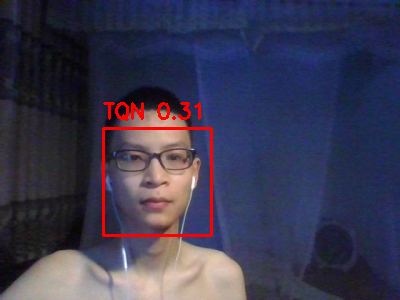

In [69]:
dis = faceDis[matchIndex]
if dis < 0.5:
		# draw the bounding box of the face along with the associated probability
		text = f'{name} {round(dis,2)}'
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
		cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
cv2_imshow(image)